# Welcome to Data Science Survival Skills [DSSS] - Exercises!

This is the very first exercise in the DSSS course, which focuses on showing you the difference between CPU and GPU-based computations. We are using Google Colab that you have access to sufficient CPU and GPU computational power. Please work through the examples below and answer the questions at the end. Save and upload your final version as either `ipynb` or `pdf`. 


# We first have to install CuPy because it is not pre-installed on Google Colab:

What is CuPy? 
It is an array library for GPU-accelerated computing with Python ([CuPy's official website](https://https://cupy.dev/))
When installing CuPy, you need to specify the [CUDA](https://en.wikipedia.org/wiki/CUDA) version, here we use 10.0 which is in line with current environment.


In [2]:
!pip install cupy-cuda100

     |████████████████████████████████| 59.0 MB 40 kB/s 


To use the GPU (or TPU):

*   Go to "Runtime" -> "Change runtime type" and select "GPU".
*   "Laufzeit" -> "Laufzeittyp ändern" and select "GPU".


We can import some modules by using the following commands:

In [3]:
import numpy as np
import cupy as cp
import time
%matplotlib inline
import matplotlib.pyplot as plt

[More info about modules](https://docs.python.org/3/tutorial/modules.html).

We are working with [numpy](https://numpy.org/) and [cupy](https://cupy.dev/), two libraries that are capable of dealing with linear algebra and more sophisticated mathematical operations, important in data science, deep learning, image processing, etc. The core data structure are `arrays`, that are multidimensional and contain the data. 

Create some np and cp arrays:

In [4]:
#you can specify the type of array using the argument 'dtype'
a_cpu = np.arange(9, dtype = np.float64).reshape(3, 3) #Which is a Numpy's array
a_gpu = cp.arange(9, dtype = cp.float64).reshape(3, 3) #Which is a Cupy's array

print(type(a_cpu))
print(a_cpu, a_cpu.dtype)
print()

print(type(a_gpu))
print(a_gpu, a_gpu.dtype)
print()

<class 'numpy.ndarray'>
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]] float64

<class 'cupy._core.core.ndarray'>
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]] float64



For more available data types, you can visit: [Data type objects](https://numpy.org/doc/stable/reference/arrays.dtypes.html)

Let's check how much time does it numpy take to do the sum of array elements

In [5]:
start_time = time.time()
np.sum(a_cpu) 
print("Time: %s milliseconds" % ((time.time() - start_time)*1E3)) #in mS

Time: 0.2617835998535156 milliseconds


**We can also use the Jupyter magics, which are more convenient: `%timeit` or  `%time` (one line) or `%%time` (the whole cell)**

In [6]:
# Example with magics:
%time np.sum(a_cpu)

CPU times: user 70 µs, sys: 2 µs, total: 72 µs
Wall time: 77.2 µs


36.0

Now CuPy

In [7]:
%time cp.sum(a_gpu)

CPU times: user 265 ms, sys: 4.95 ms, total: 270 ms
Wall time: 275 ms


array(36.)

We can also use a cross-calculation using CuPy with Numpy arrays and vice-versa

In [8]:
print("Time Numpy on GPU array: ")
%time np.sum(a_gpu) 


print("\nTime Cupy on CPU array: ")
%time cp.sum(a_cpu) 

Time Numpy on GPU array: 
CPU times: user 1.01 ms, sys: 0 ns, total: 1.01 ms
Wall time: 3.02 ms

Time Cupy on CPU array: 
CPU times: user 87 µs, sys: 3 µs, total: 90 µs
Wall time: 97.3 µs


36.0

One can create 2D Arrays with **x** columns and **y** rows by using:

In [9]:
#---------------[y, x]
rows, columns = [6, 5]
a_cpu = np.ones((rows, columns), dtype = np.uint32)
b_cpu = np.ones((rows, columns), dtype = np.uint32)

a_gpu = cp.ones((rows, columns), dtype = np.uint32)
b_gpu = cp.ones((rows, columns), dtype = np.uint32)

print('Array: \n', a_cpu)
print('\nDtype: ', a_cpu.dtype)
print('\nShape:', a_cpu.shape)

Array: 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Dtype:  uint32

Shape: (6, 5)


# Slicing and indexing

So for given tasks, indexing and slicing our arrays is very useful to avoid 'for' loops or some time-consuming operations.  A good link to check is [Numpy's Documentation for Basic (and advanced) Slicing and Indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html)

In Python, we start to count in the upper left corner (position [0,0]). Having a random array given by:

In [10]:
n = np.array(([0, 1, 2], [6, 7, 8], [3, 4, 5], [9,10,11],[12,13,14]))
print(n, n.dtype)

[[ 0  1  2]
 [ 6  7  8]
 [ 3  4  5]
 [ 9 10 11]
 [12 13 14]] int64


In [11]:
#we can bind two arrays by using
m = n # or m = n[:]
print (m)

[[ 0  1  2]
 [ 6  7  8]
 [ 3  4  5]
 [ 9 10 11]
 [12 13 14]]


In [12]:
#Sum the elements smaller than 6 and add 1
#boolean array indexing
m[m<6] += 1
#both will be affected
print('\nm:')
print(m)
print('\nn:')
print(n)


m:
[[ 1  2  3]
 [ 6  7  8]
 [ 4  5  6]
 [ 9 10 11]
 [12 13 14]]

n:
[[ 1  2  3]
 [ 6  7  8]
 [ 4  5  6]
 [ 9 10 11]
 [12 13 14]]


IMPORTANT: The following example reverses in columsn (in an image, the height), if you want to reverse the whole array it is `x[::-1, ::-1]`

In [13]:
#We can reverse the array by using: 
n = np.array(([0, 1, 2], [6, 7, 8], [3, 4, 5], [9,10,11],[12,13,14]))
n[::-1]

array([[12, 13, 14],
       [ 9, 10, 11],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 0,  1,  2]])

In [14]:
#Slicing rows 0 to 3 (0 = start, 4 = stop) and taking the second and third column element (1:3)
n[0:4,1:3]

array([[ 1,  2],
       [ 7,  8],
       [ 4,  5],
       [10, 11]])

# Image as an array

Let's now obtain an image from the internet:

In [15]:
# Loading an image is also only a numpy array,
# we talk about this in the next lectures in more detail.
from skimage import io
url = 'https://www.fau.de/files/2019/07/Kollegienhaus_Malter_3-480x284.jpg'
image = io.imread(url)
print(type(image))
print(image.shape) # This is HEIGHT, WIDTH, COLOR

<class 'numpy.ndarray'>
(284, 480, 3)


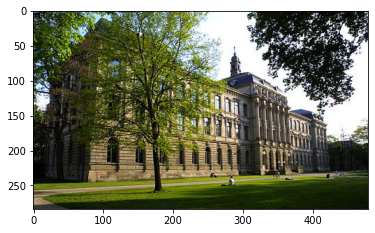

In [16]:
plt.imshow(image)

# **1. To Do**: Define an array named 'im_half' containing half of the image (using indexing) and plot it:

In [18]:
#im_half = ? # TODO
plt.imshow(im_half)

# **2. To Do**: Define an array named 'im_flipped' containing the horizontally-flipped image (using indexing) and plot it:

In [ ]:
#im_flipped = ? # TODO
plt.imshow(im_flipped)

# **CuPy vs Numpy**
The objective now is to create a way to check which is faster while calculating some simple functions like dot product or matrix sum. \\
(Matrix operations: add, substract, divide, sqrt, T) \\
(Other operations: mean, std, var, min, max, argmin, argmax)

# **3. To Do**: Create two functions named compare_numpy() and compare_cupy() with two function entries called 'size' (maximum array size) and 'step' (for the step size). Start with array sizes of (1, 1) and increase the sizes (step) until they reach (size, size). For each array size perform the matrix operation dot(a,b) and measure the computation time. Both functions should return a list with the saved times in Milliseconds.

In [ ]:
# Measuring time
t0 = time.time()
# do something here
t1 = time.time() - t0 # in seconds

In [19]:
#Definition of your functions:
def compare_numpy(size, step):
  savedTimes = [] #Tip: use the append method for empty lists
  #TODO
  return savedTimes

def compare_cupy(size, step):
  savedTimes = []
  #TODO
  return savedTimes

**This should plot the results:**

In [ ]:
size = 900  # max value of rows and cols to calculate
step = 10   # size of the step to compute
time_cpu_dot = compare_numpy(size,step)  # output containing the results of your operation with Numpy
time_gpu_dot = compare_cupy(size,step)   # output containing the results of your operation with CuPy
steps = np.arange(1,size,step)        # array to use as x-axis on our plot

In [ ]:
plt.title('Comparison of dot product: Numpy vs Cupy')
plt.plot(steps,time_cpu_dot, 'o',label = 'Numpy')
plt.plot(steps,cp.asnumpy(time_gpu_dot), 'o', label = 'Cupy') # matplolib does not support CuPy-like arrays -> cp.asnumpy(cupy_array)
plt.ylabel('time in ms')
plt.xlabel('size of the array')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

# **4. To Do**: Repeat the process with the sum operation

In [20]:
#Tip 1: You can use now a+b or sum(a,b)
#Tip 2: Let the cols value unchanged and vary the rows of the matrix
def compare_numpy_2(rows, cols, step):
  savedTimes = []
  #TODO
  return savedTimes

def compare_cupy_2(rows, cols, step):
  savedTimes = []
  #TODO
  return savedTimes

**This should plot the results:**

In [ ]:
rows = 900 # max value of rows to calculate
cols = 10  # max value of cols to calculate
step = 10  # size of the step to compute
time_cpu_sum = compare_numpy_2(rows, cols, step) # output containing the results of your operation with Numpy
time_gpu_sum = compare_cupy_2(rows, cols, step)  # output containing the results of your operation with CuPy
steps = np.arange(1,rows,step)                   # array to use as x-axis on our plot

In [ ]:
plt.title('Comparison of sum: Numpy vs Cupy')
plt.plot(steps,time_cpu_sum, '-o', label = 'Numpy')
plt.plot(steps,cp.asnumpy(time_gpu_sum), '-o', label = 'Cupy')
plt.ylabel('time in ms')
plt.xlabel('size of the array')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

#Questions


1. Which library would you use to calculate the first operation (evaluated on **compare_numpy()** and **compare_cupy()** )? Please explain your answer:

2. Which library would you use to calculate the second operation (evaluated on **compare_numpy_2()** and **compare_cupy_2()** )? Please explain your answer:

Extra: CPU VS TPU VS GPU [Nice video](https://www.youtube.com/watch?v=6TOojA72uo4)